In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer, add_sellersparameters, parameterinterpolatorstepwise, reset
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars

from lowEBMs import update_plotstyle
import lowEBMs.Packages.Constants as const

import matplotlib
import builtins
update_plotstyle()
matplotlib.rcParams['lines.linewidth']=1.7

# Application period

In [112]:
EVA_time,EVA_forcing=np.genfromtxt('Data/EVA_800_2000.txt',delimiter=',',usecols=(0,1),skip_header=1,unpack=True)
CRW_time,CRW_forcing=np.genfromtxt('Data/Crowley_800_2050.csv',delimiter=',',usecols=(1,3),skip_header=1,unpack=True)
SBF_time,SBF_forcing=np.genfromtxt('Data/tsi_SBF_11yr.txt',delimiter='',usecols=(0,1),skip_header=4,unpack=True)
VK_time,VK_forcing=np.genfromtxt('Data/tsi_VK.txt',delimiter='',usecols=(0,1),skip_header=4,unpack=True)

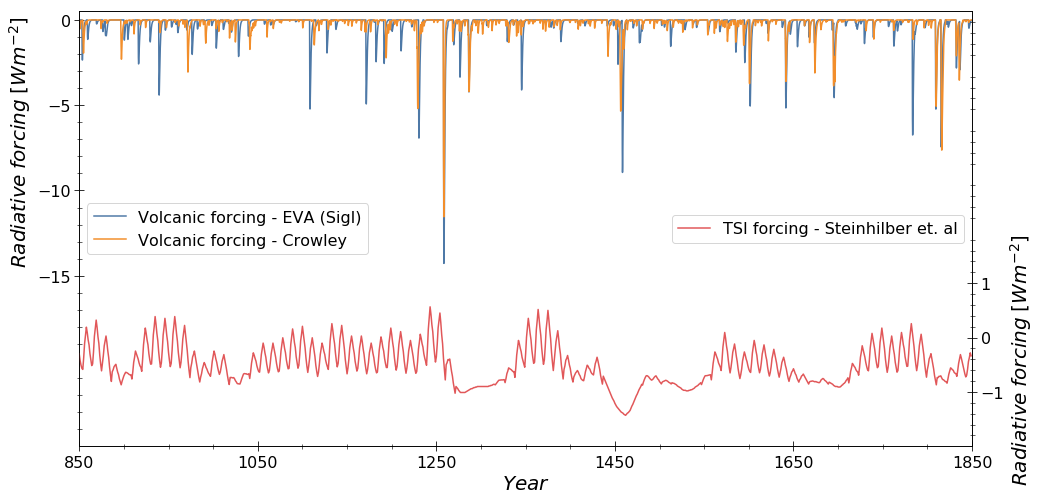

In [149]:
matplotlib.rcParams['lines.linewidth']=1.5
fig,ax=plt.subplots(1,1,figsize=(16,8))
ax.set_xlim(850,1850),ax.set_xticks(np.linspace(850,1850,6))
ax.set_xlabel('$Year$')
ax2=plt.twinx()
ax.set_yticks([])
ax2.set_yticks([])

#plt.savefig('Plots/Period_empty.eps',format='EPS',bbox_inches='tight')

ax2.plot(SBF_time,SBF_forcing-1366.14,label='TSI forcing - Steinhilber et. al',c='#e15759')
#ax2.plot(VK_time,VK_forcing-1366.14,label='TSI forcing - Muscheler et. al',c='#76b7b2')
ax2.set_ylim(-2,6),ax2.set_yticks([-1,0,1])
ax2.set_ylabel('$Radiative\; forcing\; [Wm^{-2}]$',position=(0,0.2))
ax2.legend(loc='center right',fontsize=16)
#plt.savefig('Plots/Period_TSI.eps',format='EPS',bbox_inches='tight')

ax.set_ylim(-25,0.5),ax.set_yticks(np.linspace(-15,0,4))
ax.plot(EVA_time,EVA_forcing,label='Volcanic forcing - EVA (Sigl)',c='#4e79a7')
ax.plot(CRW_time,CRW_forcing,label='Volcanic forcing - Crowley',c='#f28e2b')
ax.legend(loc='center left',fontsize=16)
ax.set_ylabel('$Radiative\; forcing\; [Wm^{-2}]$',position=(0,0.7))
plt.savefig('Plots/Period_Volc_TSI.eps',format='EPS',bbox_inches='tight')

# Radiative forcing (Generator)

In [7]:
from lowEBMs.ForcingGenerator.VolcanicForcingGenerator import *
from lowEBMs.ForcingGenerator.VolcanicForcingGenerator1D import *
EVA_time,EVA_RF,EVA_AOD,EVA_Loc=Generator('Data/Sigl2015.csv',',',2,0,1,2,4,800,2000,10/365,5)
EVA_time_Synthetic,EVA_RF_Synthetic,EVA_AOD_Synthetic,EVA_Synthetic_Loc=Synthetic('Data/Sigl2015.csv',',',2,0,1,2,4,2000,3000,10/365,5,1000)

EVA_800_2000=np.column_stack((EVA_time,EVA_RF,EVA_AOD))
EVA_2000_3000=np.column_stack((EVA_time_Synthetic,EVA_RF_Synthetic,EVA_AOD_Synthetic))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[<matplotlib.lines.Line2D object at 0x7f10440975f8>, <matplotlib.lines.Line2D object at 0x7f1044097c50>, <matplotlib.collections.PathCollection object at 0x7f104400fb70>, <matplotlib.collections.PathCollection object at 0x7f104400f828>, <matplotlib.collections.PathCollection object at 0x7f104400f940>]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


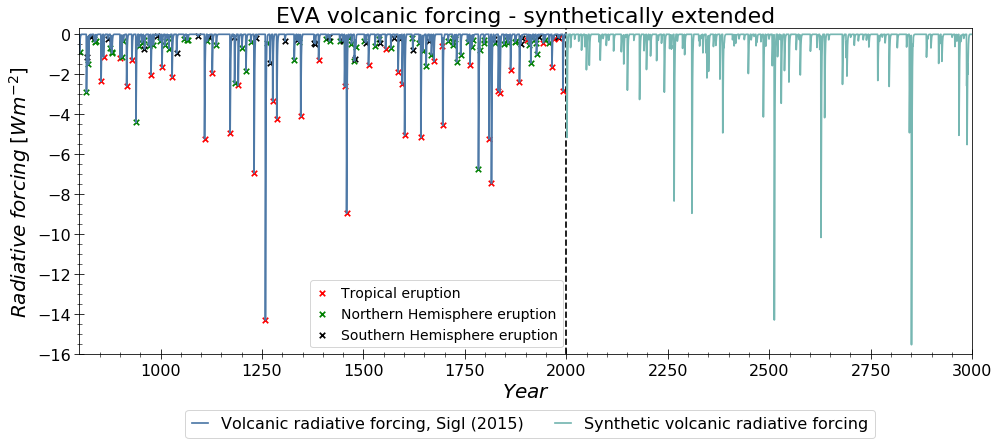

In [60]:
fig,ax=plt.subplots(figsize=(16,6))
Troptime,Trop_RF=EVA_Loc[0]
NHtime,NH_RF=EVA_Loc[1]
SHtime,SH_RF=EVA_Loc[2]

Troptime_Synthetic,Trop_RF_Synthetic=EVA_Synthetic_Loc[0]
NHtime_Synthetic,NH_RF_Synthetic=EVA_Synthetic_Loc[1]
SHtime_Synthetic,SH_RF_Synthetic=EVA_Synthetic_Loc[2]

P1=plt.plot(EVA_time,EVA_RF,label='Volcanic radiative forcing, Sigl (2015)',c='#4e79a7')
P2=plt.plot(EVA_time_Synthetic,EVA_RF_Synthetic,label='Synthetic volcanic radiative forcing',c='#76b7b2')


S1=plt.scatter(Troptime,Trop_RF,marker='x',s=30,c='r',label='Tropical eruption')
S2=plt.scatter(NHtime,NH_RF,marker='x',s=30,c='green',label='Northern Hemisphere eruption')
S3=plt.scatter(SHtime,SH_RF,marker='x',s=30,c='k',label='Southern Hemisphere eruption')

#plt.scatter(Troptime_Synthetic,Trop_RF_Synthetic,marker='x',s=30,c='r')
#plt.scatter(NHtime_Synthetic,NH_RF_Synthetic,marker='x',s=30,c='green')
#plt.scatter(SHtime_Synthetic,SH_RF_Synthetic,marker='x',s=30,c='k')
handles,labels=ax.get_legend_handles_labels()
print(handles)
leg1=plt.legend(handles[:2],labels[:2],fontsize=16,ncol=2,loc='lower right',bbox_to_anchor=(0.9,-0.28),handlelength=1)
leg2=plt.legend(handles[2:],labels[2:],fontsize=14,loc='lower center',bbox_to_anchor=(0.4,0),handlelength=1)
ax.add_artist(leg1)
plt.xlim(800,3000),plt.ylim(-16,0.3)
plt.xlabel('$Year$'),plt.ylabel('$Radiative\; forcing\; [Wm^{-2}]$')
plt.vlines(2000,-20,3,linestyle='--')
plt.title('EVA volcanic forcing - synthetically extended',fontsize=22)
plt.savefig('Plots/EVA_extended.eps',format='eps',bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


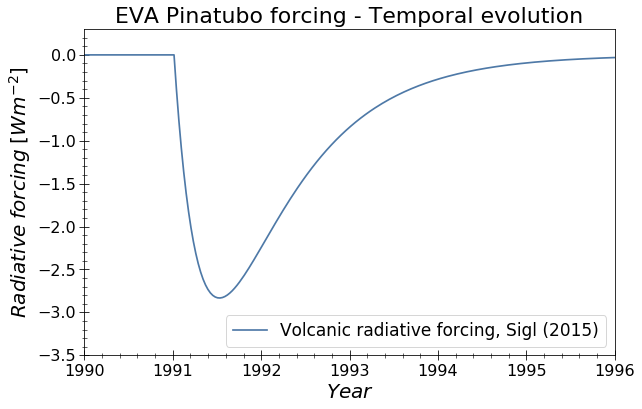

In [67]:
fig,ax=plt.subplots(1,1,figsize=(9.5,6))

ax.plot(EVA_time,EVA_RF,label='Volcanic radiative forcing, Sigl (2015)',c='#4e79a7')
ax.legend(fontsize=17,loc='lower right')
ax.set_xlim(1990,1996),ax.set_ylim(-3.5,0.3)
ax.set_xlabel('$Year$'),ax.set_ylabel('$Radiative\; forcing\; [Wm^{-2}]$')
ax.set_title('EVA Pinatubo forcing - Temporal evolution',fontsize=22)
plt.savefig('Plots/Temporal_evolution_EVA.eps',format='eps',bbox_inches='tight')

In [10]:
tprod=180
tloss=330
tmix_av=15*365/12
tres_av=17*365/12
lat=np.linspace(-85,85,18)
std_ET=18
mean_ET=45
std_EQ=18
mean_EQ=0
aod_nonlin=0.0784
aod_lin=0.0364
aod_RF=-20
EVA_1D_time,EVA_1D_RF,EVA_1D_AOD=Generator1D('Data/Sigl2015.csv',',',2,0,1,2,4,1900,2000,1/365,5\
                 ,tprod,tloss,tmix_av,tres_av,lat,std_ET,mean_ET,std_EQ,mean_EQ,aod_lin,aod_nonlin,aod_RF)

(18, 36500)


<Figure size 864x360 with 0 Axes>

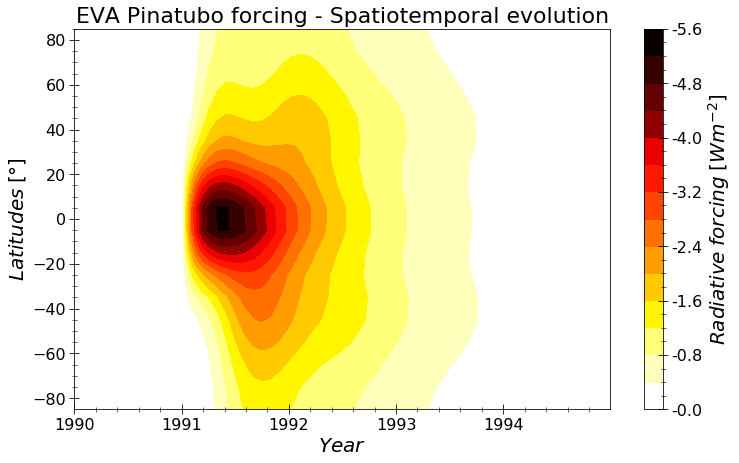

In [65]:
AOD_trans=np.transpose(EVA_1D_AOD)
RF_trans=np.transpose(EVA_1D_RF)
#print(M1D)
fig=plt.figure(figsize=(12,5))
#plt.plot(lat,data[2])
#print(len(data[0]),len(lat),data[2][:])
print(np.shape(AOD_trans))
#plt.xlim(1991,1995)
fig, ax = plt.subplots(figsize=(12,7))
plot=plt.contourf(EVA_1D_time[-365*10:-365*5],lat,AOD_trans[:,-365*10:-365*5],levels=14,cmap=plt.cm.get_cmap('hot_r',16))
cbar=fig.colorbar(plot)
cbar.set_label('$Radiative\; forcing\; [Wm^{-2}]$')
labels = [item.get_text() for item in cbar.ax.get_yticklabels()]
for k in range(len(labels)):
    labels[k]=str(np.round(float(labels[k])*(-20),2))
#print(labels)

cbar.ax.set_yticklabels(labels)
#cbar.set_ticks([0,-2,-4])
#plt.clim(-6,0)
ax.set_title('EVA Pinatubo forcing - Spatiotemporal evolution',fontsize=22)
ax.set_xlabel('$Year$')
ax.set_ylabel('$Latitudes\;[°]$')
plt.savefig('Plots/Spatiotemporal_evolution_EVA.eps',format='eps',bbox_inches='tight')

# Ensemble run

In [8]:
configFuncDiff_CTRL=importer('Data/DifferentRout_Pinatubo_CTRL.ini')

setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configFuncDiff_CTRL,parallel=True,parallel_config=setup,control=True)
print(builtins.eq_condition_amplitude)
configFuncDiff_CTRL,ParasCTRL=add_sellersparameters(configFuncDiff_CTRL,parameterinterpolatorstepwise,'SellersParameterization.ini',5,0,True,True)

Func1_4=np.array([[True,False,False,False],[False,True,False,False],[False,False,True,False],[False,False,False,True]])
for i in range(1,5):
    configFuncDiff_CTRL['funccomp']['funcparam']['func'+str(i)]['activation']=Func1_4[i-1]
FuncDiff=rk4alg(model_equation,configFuncDiff_CTRL['eqparam'],configFuncDiff_CTRL['rk4input'],configFuncDiff_CTRL['funccomp'])

Loading Configuration from: Data/DifferentRout_Pinatubo_CTRL.ini
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.
0.001
Loading Parameters from: /home/benni/anaconda3/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Eq. State reached after 55054 steps, within 194.11543679237366 seconds


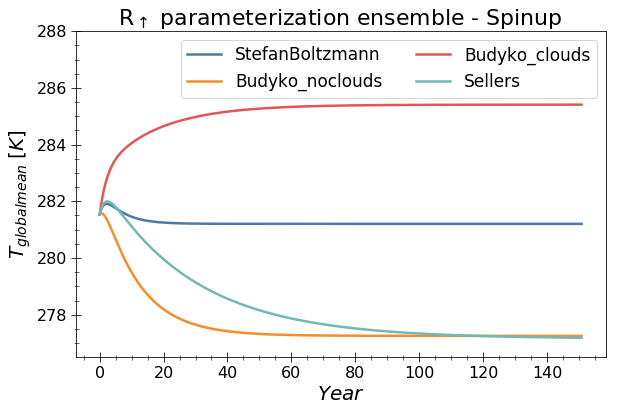

In [64]:
fig,ax=plt.subplots(figsize=(9.5,6))
labels=['StefanBoltzmann','Budyko_noclouds','Budyko_clouds','Sellers']
colors=['#4e79a7','#f28e2b','#e15759','#76b7b2']
for k in range(4):
    plt.plot(FuncDiff[0][1:]/const.time_sec_year,FuncDiff[2][1:,k],label=labels[k],c=colors[k],linewidth=2.5)
ax.legend(fontsize=17,loc='upper right',ncol=2)
ax.set_xlabel('$Year$'),ax.set_ylabel('$T_{globalmean}\;[K]$')
ax.set_ylim(276.5,288)
ax.set_title(r'R$_{\uparrow}$ parameterization ensemble - Spinup',fontsize=22)
plt.savefig('Plots/Ensemble_Spinup.eps',format='eps',bbox_inches='tight')

In [10]:
configFuncDiff=importer('Data/DifferentRout_Pinatubo.ini')

setup={'number_of_parameters': 4, 'number_of_cycles': 1, 'number_of_parallels': 4}
variable_importer(configFuncDiff,parallel=True,parallel_config=setup)

configFuncDiff,ParasCTRL=add_sellersparameters(configFuncDiff,parameterinterpolatorstepwise,'SellersParameterization.ini',5,0,True,True)

Func1_4=np.array([[True,False,False,False],[False,True,False,False],[False,False,True,False],[False,False,False,True]])
for i in range(1,5):
    configFuncDiff['funccomp']['funcparam']['func'+str(i)]['activation']=Func1_4[i-1]

Vars.T,Vars.T_global=FuncDiff[1][-1],FuncDiff[2][-1]
Data=rk4alg(model_equation,configFuncDiff['eqparam'],configFuncDiff['rk4input'],configFuncDiff['funccomp'])

Loading Configuration from: Data/DifferentRout_Pinatubo.ini
Loading Parameters from: /home/benni/anaconda3/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini


HBox(children=(IntProgress(value=0, max=14600), HTML(value='')))

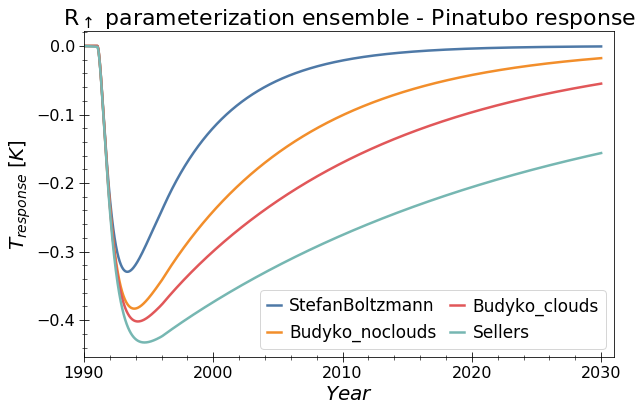

In [58]:
fig,ax=plt.subplots(figsize=(9.5,6))
labels=['StefanBoltzmann','Budyko_noclouds','Budyko_clouds','Sellers']
colors=['#4e79a7','#f28e2b','#e15759','#76b7b2']
for k in range(4):
    plt.plot(Data[0]/const.time_sec_year,Data[2][:,k]-Data[2][0,k],label=labels[k],c=colors[k],linewidth=2.5)

ax.legend(fontsize=17,loc='lower right',ncol=2,handlelength=0.8,handletextpad=0.5,columnspacing=0.8)
ax.set_xlabel('$Year$'),ax.set_ylabel('$T_{response}\;[K]$')
ax.set_xlim(1990,2031),ax.set_xticks(np.linspace(1990,2030,5))
ax.set_title(r'R$_{\uparrow}$ parameterization ensemble - Pinatubo response',fontsize=22)
plt.savefig('Plots/Ensemble_Response.eps',format='eps',bbox_inches='tight')

In [73]:
from lowEBMs.Packages.Optimization import add_parameters
configEns_CTRL=importer('Data/Ensemble_CTRL.ini')

setup={'number_of_parameters': 1, 'number_of_cycles': 1, 'number_of_parallels': 10}
variable_importer(configEns_CTRL,parallel=True,parallel_config=setup,control=True)

configFuncDiff_CTRL,ParasCTRL=add_sellersparameters(configEns_CTRL,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)

B=np.linspace(1.9,2.8,10)
add_parameters(configEns_CTRL,[B],[['func1','b']])
#Func1_4=np.array([[True,False,False,False],[False,True,False,False],[False,False,True,False],[False,False,False,True]])
#for i in range(1,5):
#   configFuncDiff_CTRL['funccomp']['funcparam']['func'+str(i)]['activation']=Func1_4[i-1]
Ens_CTRL=rk4alg(model_equation,configEns_CTRL['eqparam'],configEns_CTRL['rk4input'],configEns_CTRL['funccomp'])

Loading Configuration from: Data/Ensemble_CTRL.ini
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.
Loading Parameters from: /home/benni/anaconda3/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Eq. State reached after 33032 steps, within 144.04893231391907 seconds


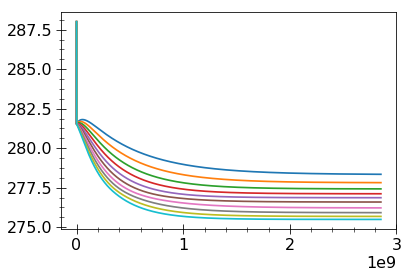

In [79]:
plt.plot(Ens_CTRL[0],Ens_CTRL[2])

In [88]:
from lowEBMs.Packages.Optimization import add_parameters
configEns=importer('Data/Ensemble.ini')

setup={'number_of_parameters': 1, 'number_of_cycles': 1, 'number_of_parallels': 10}
variable_importer(configEns,parallel=True,parallel_config=setup)

configEns,ParasCTRL=add_sellersparameters(configEns,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)

B=np.linspace(1.9,2.8,10)
add_parameters(configEns,[B],[['func1','b']])
Vars.T,Vars.T_global=Ens_CTRL[1][-1],Ens_CTRL[2][-1]
Ens=rk4alg(model_equation,configEns['eqparam'],configEns['rk4input'],configEns['funccomp'])

Loading Configuration from: Data/Ensemble.ini
Loading Parameters from: /home/benni/anaconda3/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini


HBox(children=(IntProgress(value=0, max=14600), HTML(value='')))

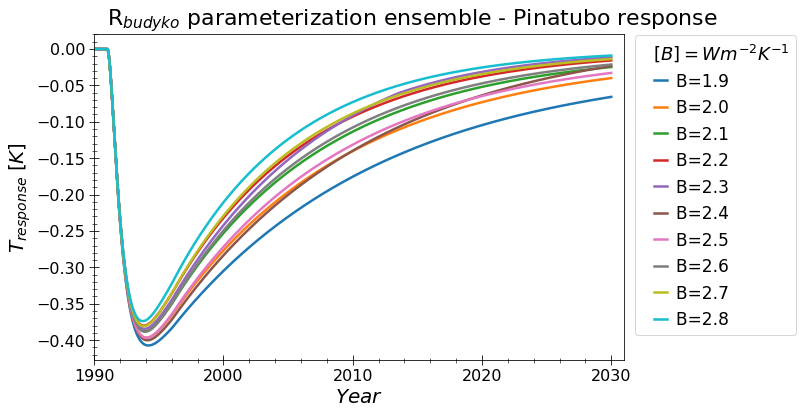

In [111]:
fig,ax=plt.subplots(figsize=(9.5,6))
labels_paras=[]
for k in range(10):
    labels_paras.append('B='+str(np.round(B[k],1))+'         ')
#labels=['StefanBoltzmann','Budyko_noclouds','Budyko_clouds','Sellers']
#colors=['#4e79a7','#f28e2b','#e15759','#76b7b2']
for k in range(10):
    plt.plot(Ens[0]/const.time_sec_year,Ens[2][:,k]-Ens[2][0,k],label=labels_paras[k],linewidth=2.5)

ax.legend(fontsize=17,loc='lower right',bbox_to_anchor=(1.34,0.05),ncol=1,title='  $[B]=Wm^{-2}K^{-1}$',\
          title_fontsize=18,handlelength=0.8,handletextpad=0.5,columnspacing=0.8)
ax.set_xlabel('$Year$'),ax.set_ylabel('$T_{response}\;[K]$')
ax.set_xlim(1990,2031),ax.set_xticks(np.linspace(1990,2030,5))
ax.set_title(r'R$_{budyko}$ parameterization ensemble - Pinatubo response',fontsize=22,position=(0.6,1.01))
plt.savefig('Plots/EnsembleParameters_Response.eps',format='eps',bbox_inches='tight')

# Outlook

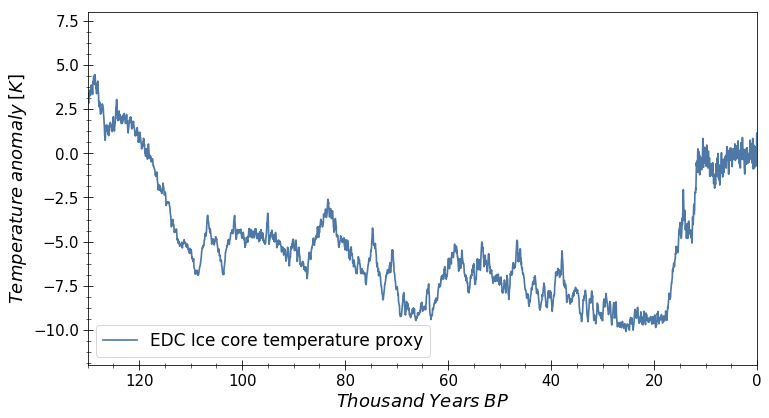

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
#from Packages.Functions import*
from lowEBMs import update_plotstyle, moving_average
update_plotstyle()
icecore=np.genfromtxt('Data/edc3deuttemp2007.txt',skip_header=104,unpack=True,encoding='ISO-8859-1')
#data=np.genfromtxt('../ebms/Figures/graph.csv',skip_header=2,delimiter=',')
#data_flip=list(map(list, zip(*data)))
time_ice=icecore[2]
temp=icecore[4]
O18=icecore[3]

colors=['#4e79a7','#f28e2b','#e15759','#76b7b2']

fig,ax=plt.subplots(figsize=(12,6.5))
#ax.set_title('Icecore deuterium temperature record, 800ky to present',fontsize=22)
ax.plot(np.array(time_ice)/1000,moving_average(temp,5),c=colors[0],linewidth=1.7,label='EDC Ice core temperature proxy')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlim(1.3*10**2,0)
ax.set_xlabel('$Thousand\; Years\; BP$',fontsize=18)
#ax.xaxis.set_label_coords(0.75, -0.1)
#ax.yaxis.set_label_coords(-0.05, 0.35)
ax.set_ylim(-12,8)
#plt.yticks(np.arange(-10,8,2))
ax.set_ylabel('$Temperature\;anomaly\;[K]$',fontsize=18)
#a=ax.get_xticks().tolist()
#a=np.array(a,dtype=int)
#ax.set_xticklabels(a)


plt.legend(fontsize=17,loc='lower left')

#plt.subplots_adjust(wspace=0.0,left=0)
plt.savefig('Plots/Deglaciation.eps',format='EPS',bbox_inches='tight')